# File to show the points over the image of the training dataset 

In [4]:
import numpy as np
import sys
sys.path.append('..')
from util.dataset_util import read_data, project_3d_to_2d, plot_over_image

In [5]:
# path to the parent directory (contains test/ meta/)
dataset_name = 'humansc3d'

In [6]:
data_root = '/Users/andreaongaro/Documents/Documenti Andrea Ongaro/Magistrale/Torino/Corsi/2_ANNO/ComputerVision/Project/lcn-pose/dataset/'
subset = 'train' # select from ['train']
subj_name = 's01' # subject names for 'train' subset
action_name = '100'# action names
camera_name = '60457274' # select from ['50591643', '58860488', '60457274', '65906101']

In [7]:
frames, j3ds, cam_params, gpp_data, smplx_param_data, annotations = read_data(data_root, 
                                                                            dataset_name, 
                                                                            subset, 
                                                                            subj_name, 
                                                                            action_name, 
                                                                            camera_name)

(3, 3)
(1, 3)
(3, 3)
DATI 3D
[[ 0.00536122  0.167223    0.910662  ]
 [ 0.0774728   0.279245    0.894296  ]
 [ 0.0530203   0.267335    0.453689  ]
 [-0.0532961   0.314578    0.0220243 ]
 [-0.0671141   0.0551659   0.925063  ]
 [-0.0611191   0.0364856   0.484054  ]
 [-0.183728    0.0701577   0.055448  ]
 [-0.0245167   0.164522    1.14732   ]
 [ 0.0126898   0.196859    1.39509   ]
 [ 0.0739189   0.165435    1.49245   ]
 [ 0.0736929   0.179398    1.6066    ]
 [ 0.0632981   0.31875     1.31162   ]
 [ 0.116529    0.378444    1.03852   ]
 [ 0.173769    0.337891    0.797935  ]
 [-0.0656465   0.0716603   1.34435   ]
 [-0.128345   -0.0756516   1.10909   ]
 [ 0.109513    0.00325145  1.10902   ]
 [ 0.0877083   0.247153    0.0242039 ]
 [ 0.152526    0.210817    0.014042  ]
 [-0.0617532  -0.025233    0.0340956 ]
 [-0.00289165 -0.0691107   0.0187634 ]
 [ 0.138252    0.245024    0.80862   ]
 [ 0.19047     0.320342    0.700914  ]
 [ 0.0867094  -0.00737227  1.2058    ]
 [ 0.187655    0.112235    1.13939 

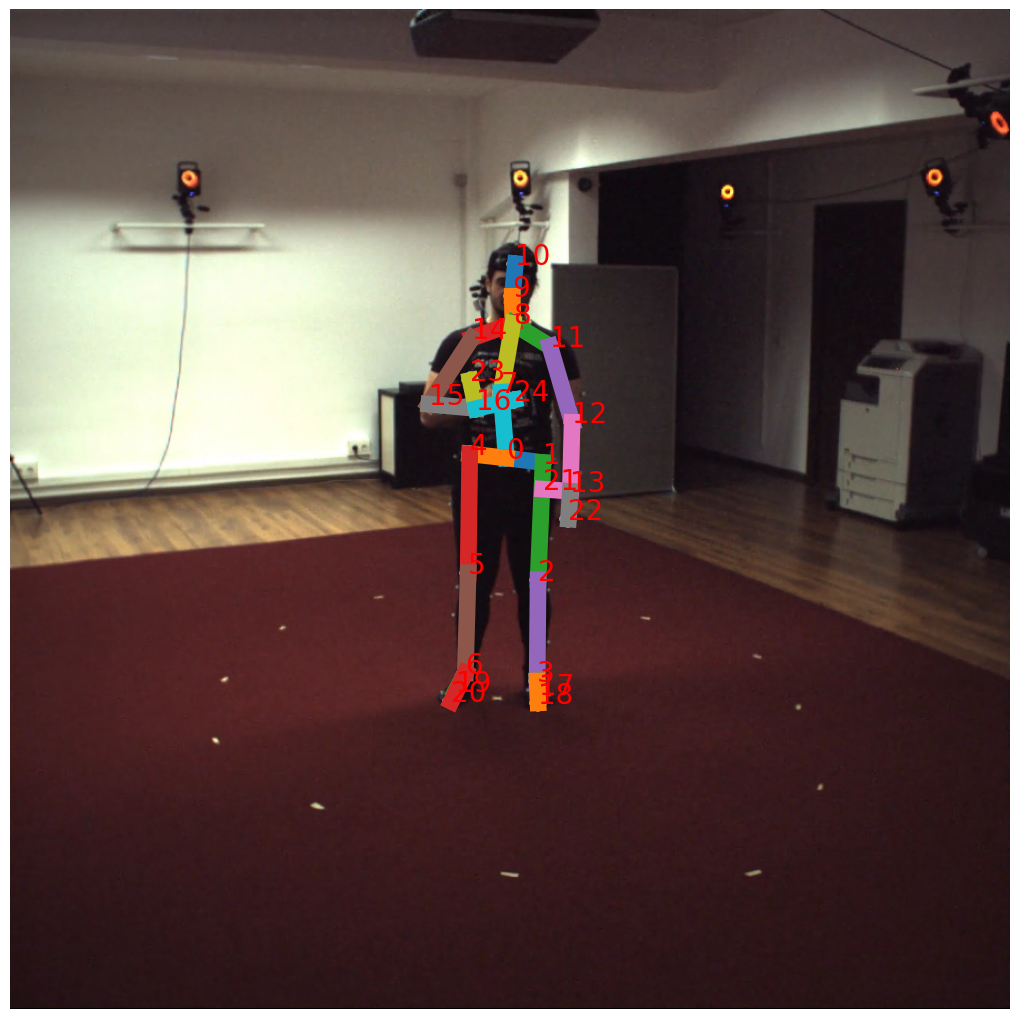

In [8]:
frame_id = annotations[action_name]['fr_id']
j3d = j3ds[frame_id]
R = cam_params['extrinsics']['R']
T = cam_params['extrinsics']['T']
print(R.shape)
print(T.shape)
print(np.transpose(R).shape)
# Convert 3D joint coordinates to camera coordinates
# Note: The camera extrinsics are assumed to be in the format [R|T], where R is the rotation matrix and T is the translation vector.
# The translation vector T is subtracted from the 3D joint coordinates before applying the rotation.
# This is a common convention in computer vision, but you should verify that this is the case for your specific dataset.

print("DATI 3D")
print(j3d)
j3d_in_camera = np.matmul(np.array(j3d) - cam_params['extrinsics']['T'], np.transpose(cam_params['extrinsics']['R']))
print("DATI 3D CONVERTITI")
print(j3d_in_camera)
frame = frames[frame_id]
j2d_camera = project_3d_to_2d(j3d_in_camera, cam_params['intrinsics_w_distortion'], 'w_distortion')
print("DATI 2D")
print(j2d_camera)
plot_over_image(frame, j2d_camera)